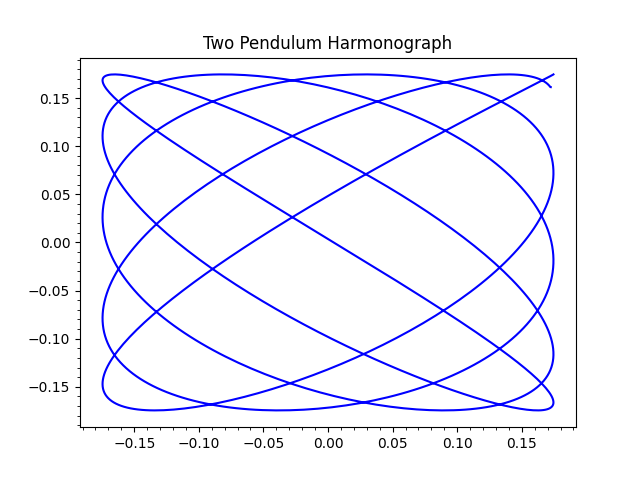

In [23]:
"""harmonograph.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import solve_ivp  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

# Set Initial Conditions
pendulum1_length: float = 1.0  # meters
theta1_initial: float = np.radians(10)  # degrees
omega1_initial: float = 0.0  # radians/sec

pendulum2_length: float = 1.5  # meters
theta2_initial: float = np.radians(10)  # degrees
omega2_initial: float = 0.0  # radians/sec


def model(
    time, state_vector: tuple[float, float], phase_constant: float
) -> tuple[float, float]:
    omega: float
    theta: float
    omega, theta = state_vector
    d_omega: float = -phase_constant * np.sin(theta)
    d_theta: float = omega
    return d_omega, d_theta


def plot(ax: Axes) -> None:
    # Precalculate phase constants
    phase1_constant: float = 9.81 / pendulum1_length
    phase2_constant: float = 9.81 / pendulum2_length

    # Set model duration (seconds)
    time_initial = 0
    time_final = 10

    # Calculate trajectory of 1st pendulum
    sol: Any = solve_ivp(
        model,
        (time_initial, time_final),
        [omega1_initial, theta1_initial],
        max_step=0.01,
        args=[phase1_constant],
    )
    time_steps: NDArray[np.float_] = np.array(sol.t, dtype=np.float_)
    omega1: NDArray[np.float_]
    theta1: NDArray[np.float_]
    omega1, theta1 = np.array(sol.y, dtype=np.float_)

    # # Calculate trajectory of 2nd pendulum
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [omega2_initial, theta2_initial],
        max_step=0.01,
        args=[phase2_constant],
    )
    omega2: NDArray[np.float_]
    theta2: NDArray[np.float_]
    omega2, theta2 = np.array(sol.y, dtype=np.float_)

    # Ensure both vectors are same length
    if len(theta1) > len(theta2):
        theta1 = theta1[: len(theta2)]
    if len(theta2) > len(theta1):
        theta2 = theta2[: len(theta1)]

    ax.plot(theta1, theta2, color="blue", linestyle="solid")

    ax.set_title("Two Pendulum Harmonograph")

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_harmonograph() -> None:
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes())
    plt.show()


plot_harmonograph()

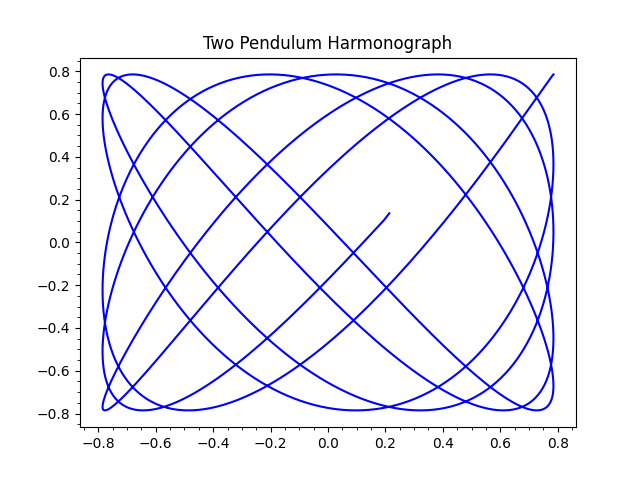

In [24]:
# Cell 2

# pendulum1=pendulum2 length initial condition
pendulum1_length = 1.0  # meters
theta1_initial = np.radians(45)  # degrees
omega1_initial = 0.0  # radians/sec

pendulum2_length = 0.5  # meters
theta2_initial = np.radians(45)  # degrees
omega2_initial = 0.0  # radians/sec

plot_harmonograph()